In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [3]:
from IPython.display import Image
from pandas import DataFrame 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties 

font = FontProperties(fname="/home/gezi/soft/simsunttc/msyh.ttf", size=12)  #size可不用指定

In [4]:
import gezi
from libgezi import utf82gbk, gbk2utf8

In [5]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS
 
flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/lijiaoshou/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.keep100', '')
flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.w2v/', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.ct0', '')

#flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/keyword/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/keyword/model/rnn.lijiaoshou2/', '')

flags.DEFINE_string('seg_method_', 'basic', '')

flags.DEFINE_string('op_name', 'words_importance', 'default is cosine sim importance or encoder_words_importance for maxpooling importance')
#flags.DEFINE_string('op_name', 'encoder_words_importance', 'default is cosine sim importance or encoder_words_importance for maxpooling importance')

import gezi
import melt 
from deepiu.util import text2ids

import numpy as np

text2ids.init(FLAGS.vocab)

predictor = melt.Predictor(FLAGS.model_dir)

def predict(text, text2=None, topn=0):
  text = utf82gbk(text)
  timer = gezi.Timer()
  text_ids = text2ids.text2ids(text, FLAGS.seg_method_, feed_single=True)
  #print('text_ids', text_ids)
    
  if topn:
    #print(tf.get_default_graph().get_all_collection_keys())
    vocab = text2ids.vocab
    scores = predictor.inference('text_words_score', feed_dict = {'rnn/main/text:0': [text_ids]})
    #print(scores)
    scores = scores[0]
    indexes = (-scores).argsort()[:topn]
    print(' '.join(['%s:%.6f'%(gbk2utf8(vocab.key(index)), scores[index]) for index in indexes]))
    return
    
  #print(tf.get_collection('debug_seqeuence'))
  #x  =  predictor.inference(['debug_seqeuence'], index=0,
  #                                  feed_dict= {
  #                                    'rnn/main/text:0': [text_ids]
  #                                    })

  #print(x)
  #return
    
    
  if text2 is not None:
    text2 = utf82gbk(text2)
    text2_ids = text2ids.text2ids(text2, FLAGS.seg_method_, feed_single=True)
    score = predictor.inference('textsim', 
                                    feed_dict= {
                                      'rnn/main/text:0': [text_ids],
                                      'rnn/main/text2:0': [text2_ids]
                                      #'rnn/main/text2:0':[gezi.pad([1], 50)]
                                      })
    print(score[0], len(score[0]))
    return score[0]

  #seq_len = 50	


  #print('words', words)
  argmax_encode = predictor.inference([FLAGS.op_name], 
                                    feed_dict= {
                                      'rnn/main/text:0': [text_ids]
                                      })
  #print('argmax_encode', argmax_encode[0])
  

  argmax_encode = argmax_encode[0][0]
  #argmax_encode = [max(x, 0) for x in argmax_encode]

  #print('----', len(argmax_encode))

  text_ids =  text2ids.text2ids(text, FLAGS.seg_method_, feed_single=True, append_start=True, append_end=True)
  words = text2ids.ids2words(text_ids)
    
  words = [gbk2utf8(x) for x in words]

  seq_len = 0
  for x in words:
  	if x != 0:
  		seq_len += 1
  	else:
  		break

  #print(text_ids)

   # visualize model
  import matplotlib.pyplot as plt
  #argmaxs = [np.sum((argmax_encode==k)) for k in range(seq_len)]
    
  argmaxs = argmax_encode[:seq_len]
  #print('argmaxs', argmaxs, np.sum(argmaxs), seq_len)
  x = range(len(argmaxs))
  total = sum([x for x in argmaxs if x > 0])
  y = [100.0*n/total for n in argmaxs]
  #print(words, y)
  print(gbk2utf8(text))
  
  #for word, score in zip(words, y):
  #  print(word, score)
  
  fig = plt.figure()
  
  #words = [x.decode('utf8') for x in words]
  #words = [i for i in range(len(words))]

  #plt.xticks(x, words, rotation=45)
  #plt.bar(x, y)
  #plt.ylabel('%')
  #plt.title('Visualisation of words importance')

  df = DataFrame({"%":y}, index=words) 
  ax = df.plot(kind = 'bar', rot = 90) 
  labels = [label.decode("utf-8") for label in df.index.values] 
  ax.set_xticklabels(labels, fontproperties=font) 
    
  #zhfont1 = matplotlib.font_manager.FontProperties(fname='/home/gezi/soft/simsunttc/msyh.ttf')
  #plt.xlabel('性别',fontproperties=zhfont1)
  #plt.ylabel('人数',fontproperties=zhfont1)
  #plt.xticks( (0,1),('男','女') ,fontproperties=zhfont1)
  #plt.bar(left=(0,1), height=(1,0.5), width=0.35)
  
  plt.title('Visualisation of words importance')
  #plt.title('句子词汇重要度')
  plt.show()

tensorflow_version: 1.2.0-rc0
ENCODE_UNK 1
restore from /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.w2v/model.ckpt-83.9-107000


INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.w2v/model.ckpt-83.9-107000


import graph ok /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.w2v/model.ckpt-83.9-107000.meta
restore ok /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.w2v/model.ckpt-83.9-107000


In [6]:
def top_words(text, topn=100):
  return predict(text, topn=topn)

In [7]:
top_words('高铁')

铁:0.929041 高:0.520840 效静:0.438351 waki:0.424352 佳源:0.410362 博信:0.402497 精度:0.401150 单相:0.395726 烧饭:0.394268 流网:0.393723 顺安:0.393386 麦斯:0.392547 双轴:0.391998 13805194935:0.390734 轮渡:0.388691 海棠:0.388136 法兰克福:0.386536 饥渴:0.385919 华迪克:0.385281 加热:0.384517 洁身:0.384100 派发:0.383317 渠:0.383310 难耐:0.383022 钙镁:0.380309 钻床:0.379559 取决:0.378974 进站:0.378590 铣刀:0.378158 殖:0.377986 玟:0.376861 支点:0.375783 下次:0.374913 油油:0.374622 钱江:0.374194 柯尼卡:0.373891 载体:0.373754 铁建:0.372667 小丸子:0.372636 金佳特:0.372536 裱:0.372383 各类:0.372136 松陵:0.372083 宝来:0.371291 抢答:0.371181 欢迎:0.369963 信威:0.369769 美感:0.369760 微量:0.369214 废钢:0.368818 金陶:0.368801 运算:0.368698 福龙:0.368629 物件:0.368553 住所:0.368300 卓众:0.368143 家坝:0.367813 遵:0.367812 协力:0.367421 成色:0.367118 通运:0.366207 手摇:0.365986 扭矩:0.365648 商:0.365418 西门:0.365379 jp762a:0.365374 门禁:0.365250 霍氏:0.364833 产能:0.364672 沈:0.364575 遵循:0.364493 乘务:0.364219 赛特:0.363947 电建:0.363788 福运达:0.363350 恒丰:0.363322 顶端:0.363305 杂物:0.362859 拍仪:0.362822 沅:0.362818 预购:0.362817 一说:0.362641 铣床:0

In [8]:
top_words('墨镜')

墨镜:1.000000 黄皮:0.507952 手电:0.499447 天宝:0.492539 纤薄:0.491738 机芯:0.491104 珍惜:0.489585 分量:0.487972 网线:0.483805 过敏:0.479442 小气:0.478826 便携:0.475234 r9s:0.472875 充电:0.472590 谨记:0.469966 毫安:0.469284 超长:0.465204 闭门:0.462154 词典:0.458237 夜间:0.456886 粉底:0.452362 开关:0.452003 惠达:0.451735 239:0.451333 锁:0.450362 待产:0.450218 扳指:0.450146 坐垫:0.449949 g4:0.448753 贺卡:0.448386 欧可:0.447738 人手:0.447476 尼亚:0.447328 千兆:0.446531 噌:0.446077 其妙:0.445506 摔:0.445199 ht380d:0.444785 玟:0.444073 amd:0.444022 陀螺:0.443481 纸雕:0.443224 上电:0.443179 护发:0.442850 桶:0.442459 pid:0.441631 膝:0.441567 mah:0.440770 i7:0.440751 夜视:0.440737 足以:0.438765 机身:0.438729 爆胎:0.438144 数显:0.437141 渐变:0.436783 pbt:0.436700 裂变:0.436271 窗式:0.436146 15mm:0.436131 肩膀:0.434547 扔掉:0.434076 量化:0.434033 洁身:0.433355 父亲:0.432824 着手:0.432251 器:0.431597 手提:0.431525 塑性:0.431500 雨布:0.431234 方形:0.429923 小巧:0.429787 探路:0.428770 失灵:0.428660 断电:0.428459 钛:0.428324 丘:0.428039 usb:0.427304 酒盒:0.427064 开车:0.425595 4880:0.425016 大声:0.424662 外在:0.424471 宁花:0.42381

In [9]:
predict('墨镜', '墨镜')

[ 0.99999976] 1


array([ 0.99999976], dtype=float32)

In [10]:
predict('墨镜', '鼻子')

[ 0.32870817] 1


array([ 0.32870817], dtype=float32)

In [11]:
top_words('美女')

美女:1.000000 直播:0.547041 主播:0.473087 女生:0.465363 聊天:0.454685 真人:0.454574 裁缝:0.453658 小丑:0.448447 美眉:0.447449 相投:0.440902 唱歌:0.439377 单身:0.438379 辣妹:0.436559 娇羞:0.432825 水嫩:0.429956 健美:0.427821 尼奥:0.425460 内向:0.424936 搭讪:0.420174 伤身:0.419888 蝶妆:0.413260 热辣:0.410764 大龄:0.410751 误删:0.408550 校花:0.406451 害羞:0.405177 睡着:0.404963 好转:0.404126 妹:0.403962 配对:0.403186 模思:0.401144 蓓蕾:0.399797 素人:0.399746 皇后:0.399594 开怀:0.399287 交友:0.399114 遭殃:0.398280 喜之缘:0.397450 怡佳:0.397270 出轨:0.397128 动漫:0.394612 妻子:0.391019 约会:0.390512 东门:0.389569 无聊:0.389367 红娘:0.388181 恋:0.387136 物语:0.382411 宣布:0.382264 空虚:0.382035 良缘:0.381994 饥:0.381741 找到:0.381029 受用:0.380678 丽人:0.380034 名轩:0.378860 柔韧:0.376765 踏入:0.376714 306080:0.375946 放过:0.375940 环亚:0.374233 应邀:0.373597 主教:0.373388 婧:0.373149 沙宣:0.372986 外遇:0.372287 播:0.371239 秀:0.370638 地网:0.370101 大头:0.368707 综艺:0.368697 追:0.368633 撒娇:0.368473 女孩:0.368466 学:0.367948 抢注:0.367532 加贝:0.367498 赘:0.367331 别怕:0.366963 舞动:0.366402 女皇:0.366182 巍:0.366028 致:0.364712 et:0.36445

iPhone隐藏功能：高铁也能在线选座了！


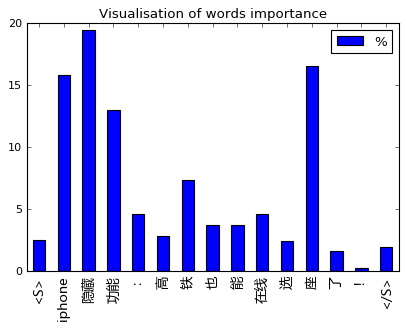

In [12]:
predict('iPhone隐藏功能：高铁也能在线选座了！')

In [13]:
predict('iPhone隐藏功能：高铁也能在线选座了！', 'iPhone')

[ 0.36559057] 1


array([ 0.36559057], dtype=float32)

In [14]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁')

[ 0.17558861] 1


array([ 0.17558861], dtype=float32)

In [15]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁选座')

[ 0.45471042] 1


array([ 0.45471042], dtype=float32)

往返飞旧金山?真是赚了,我一直在这里买!


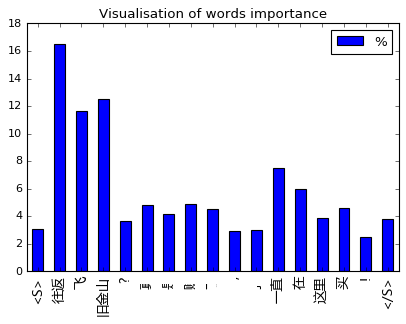

In [16]:
predict('往返飞旧金山?真是赚了,我一直在这里买!')

我的家乡惠州越来越热，选一款喜欢的墨镜很重要


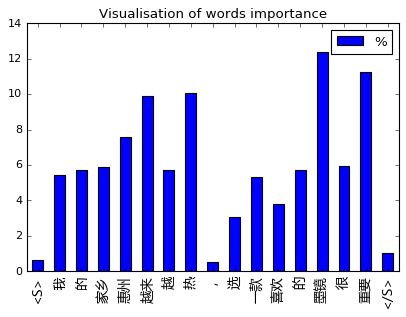

In [17]:
predict('我的家乡惠州越来越热，选一款喜欢的墨镜很重要')

In [18]:
predict('我的家乡惠州越来越热，选一款喜欢的墨镜很重要', '我的家乡惠州越来越热')

[ 0.5988903] 1


array([ 0.5988903], dtype=float32)

In [19]:
predict('我的家乡惠州越来越热，选一款喜欢的墨镜很重要', '选一款喜欢的墨镜很重要')

[ 0.61119747] 1


array([ 0.61119747], dtype=float32)

In [20]:
predict('选一款喜欢的墨镜很重要,我的家乡惠州越来越热', '我的家乡惠州越来越热')

[ 0.54857773] 1


array([ 0.54857773], dtype=float32)

In [21]:
predict('选一款喜欢的墨镜很重要,我的家乡惠州越来越热', '选一款喜欢的墨镜很重要')

[ 0.6538465] 1


array([ 0.6538465], dtype=float32)

我的家乡越来越热，选一款喜欢的墨镜很重要


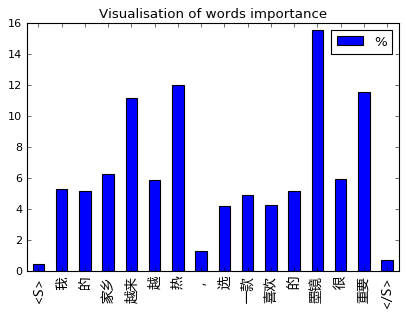

In [22]:
predict('我的家乡越来越热，选一款喜欢的墨镜很重要')

选一款喜欢的墨镜很重要，我的家乡越来越热


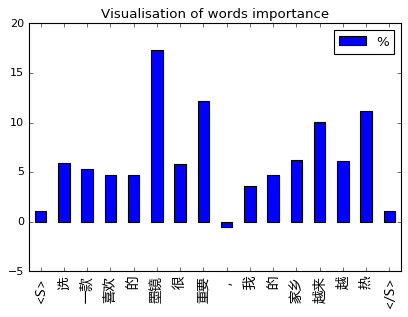

In [23]:
predict('选一款喜欢的墨镜很重要，我的家乡越来越热')

选一款喜欢的墨镜很重要


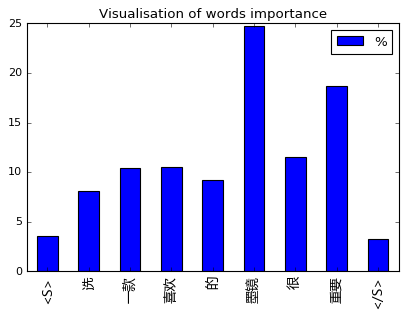

In [24]:
predict('选一款喜欢的墨镜很重要')

不要住酒店，这里的民宿好


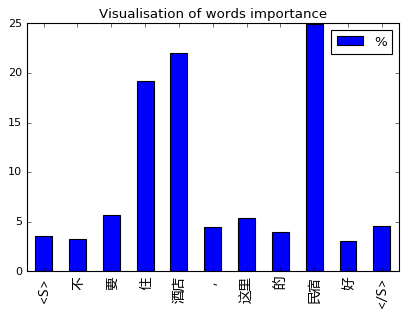

不要住民宿，这里的酒店好


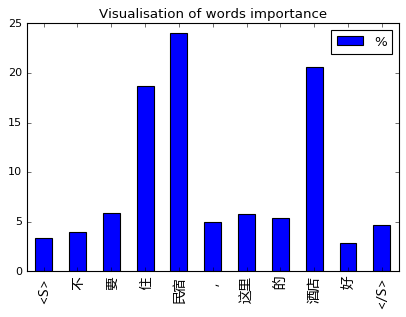

In [25]:
predict('不要住酒店，这里的民宿好')
predict('不要住民宿，这里的酒店好')

In [26]:
top_words('酒店')

酒店:1.000000 布草:0.617320 格雷斯:0.566602 水疗:0.537298 住:0.518056 公寓:0.496805 独栋:0.491864 会所:0.489996 23000:0.488626 喜来登:0.481583 ﹐:0.479732 107:0.478890 民宿:0.477816 旅馆:0.475594 七彩堂:0.467752 府邸:0.466535 餐厅:0.461800 虽:0.459704 湿地:0.456793 租房:0.455707 同里:0.454746 1700:0.448303 五环:0.446647 楠木:0.445446 提案:0.444378 湖景:0.440833 客房:0.439845 滨江:0.438130 440:0.437737 宾馆:0.436529 空间:0.436482 古城:0.435016 小鸣:0.434616 3800:0.433173 宏伟:0.433149 桑拿:0.431750 enjoy:0.431511 精装:0.431477 o2:0.431149 泳池:0.430120 零卖:0.429641 饭店:0.429003 阳春:0.428630 四合院:0.427358 怒加:0.425852 岦:0.425135 百家:0.424567 临湘:0.423361 广田:0.422955 市中心:0.422136 7800:0.421366 套房:0.420794 房:0.420079 播撒:0.419209 芽庄:0.419095 场地:0.419019 山顶:0.418717 红专:0.418137 遍及:0.417168 平谷:0.416932 家装:0.415158 携程:0.415088 嘉宝:0.414986 精鼎:0.414671 紫云轩:0.413811 loft:0.413337 布置:0.413331 291:0.411453 富美达:0.411130 会场:0.410815 金翔:0.409636 层高:0.409297 别墅:0.409200 117:0.408939 首府:0.408879 租金:0.408267 创汇:0.407908 欠债:0.407776 丫丫:0.407732 酒吧:0.406876 会议:0.405261 瞰:0.4049

In [27]:
top_words('新加坡')

新加坡:1.000000 旅游:0.592726 澳洲:0.590228 移居:0.553542 清迈:0.537717 客栈:0.536803 安提瓜:0.531894 游:0.527260 移民:0.525011 马来西亚:0.522947 美国:0.521633 大阪:0.519504 民航:0.517542 古镇:0.515651 p50:0.510054 enomatic:0.504975 旧金山:0.504677 住宿:0.504342 各国:0.499423 长岛:0.499211 悦榕:0.497169 欧洲:0.494250 艺境:0.494233 奥地利:0.492499 107:0.491853 service:0.491159 澳:0.490683 更改:0.490605 梅州:0.490344 套票:0.490309 121:0.490092 放出:0.489936 挪威:0.488780 龙脉:0.486256 132:0.485631 蜜柚:0.483612 汇福:0.483343 拿永:0.481899 欧元:0.480877 邮轮:0.480159 桂林:0.479357 正序:0.477651 美元:0.477345 洛杉矶:0.475653 彩票:0.474944 护照:0.473741 5999:0.472955 澳大利亚:0.472495 景点:0.472270 定居:0.472047 follow:0.470634 187:0.469901 旅馆:0.467968 初六:0.467829 置业:0.466394 灞河:0.466309 富力:0.466274 假期:0.465532 白鹭:0.464975 社:0.464235 景区:0.463353 一举:0.462676 遨游:0.462097 马代:0.461431 湿地:0.460931 波兰:0.460729 上城:0.460611 乔治:0.460476 锦城:0.460339 收紧:0.459761 龙子湖:0.459323 7900:0.459202 温泉:0.458544 甲米:0.457913 城中:0.457851 海岛:0.457688 汇展:0.457087 三亚:0.456079 土地:0.455723 1900:0.455647 奇妙:0.45

In [28]:
top_words('民宿')

民宿:1.000000 旅馆:0.614558 白鹭:0.501095 公寓:0.500540 107:0.499834 湿地:0.497053 古镇:0.490849 小城:0.488620 坐落:0.483946 景区:0.483908 旅游:0.483474 花园:0.482093 住:0.480520 金翔:0.477831 酒店:0.477816 客栈:0.476887 独栋:0.475372 23000:0.473548 楼盘:0.468695 移居:0.465871 五环:0.465153 湖景:0.462327 芽庄:0.459195 正序:0.459052 216:0.456984 携程:0.456150 新城:0.455787 订房:0.453094 彩票:0.453065 梅州:0.452869 房产:0.452353 地铁:0.452282 格雷斯:0.451096 八达岭:0.450050 公园:0.449962 尾盘:0.449452 邸:0.449305 济州:0.447524 平谷:0.446854 蓝调:0.441526 府邸:0.441012 海底:0.440648 三期:0.440618 7800:0.439675 景观:0.438960 马来西亚:0.438136 loft:0.437691 湾:0.437556 房子:0.437094 赏花:0.436785 看房:0.435552 113:0.434643 购房:0.433234 新加坡:0.431927 小镇:0.431507 星际:0.431055 马代:0.430569 起价:0.430331 西塘:0.429994 绿地:0.428674 涿州:0.428524 别墅:0.428508 庄园:0.427924 临江:0.427262 度假:0.427182 泳池:0.427154 湖:0.426916 瞰:0.426720 龙脉:0.425967 墅:0.425245 灞河:0.425203 锦园:0.424646 环山:0.424555 蜜柚:0.424125 优游:0.424006 台北:0.423455 套房:0.422976 置业:0.422789 现房:0.422743 440:0.421108 嘉汇:0.420791 单价:0.419919 坟:0.41

In [29]:
top_words('酒店')

酒店:1.000000 布草:0.617320 格雷斯:0.566602 水疗:0.537298 住:0.518056 公寓:0.496805 独栋:0.491864 会所:0.489996 23000:0.488626 喜来登:0.481583 ﹐:0.479732 107:0.478890 民宿:0.477816 旅馆:0.475594 七彩堂:0.467752 府邸:0.466535 餐厅:0.461800 虽:0.459704 湿地:0.456793 租房:0.455707 同里:0.454746 1700:0.448303 五环:0.446647 楠木:0.445446 提案:0.444378 湖景:0.440833 客房:0.439845 滨江:0.438130 440:0.437737 宾馆:0.436529 空间:0.436482 古城:0.435016 小鸣:0.434616 3800:0.433173 宏伟:0.433149 桑拿:0.431750 enjoy:0.431511 精装:0.431477 o2:0.431149 泳池:0.430120 零卖:0.429641 饭店:0.429003 阳春:0.428630 四合院:0.427358 怒加:0.425852 岦:0.425135 百家:0.424567 临湘:0.423361 广田:0.422955 市中心:0.422136 7800:0.421366 套房:0.420794 房:0.420079 播撒:0.419209 芽庄:0.419095 场地:0.419019 山顶:0.418717 红专:0.418137 遍及:0.417168 平谷:0.416932 家装:0.415158 携程:0.415088 嘉宝:0.414986 精鼎:0.414671 紫云轩:0.413811 loft:0.413337 布置:0.413331 291:0.411453 富美达:0.411130 会场:0.410815 金翔:0.409636 层高:0.409297 别墅:0.409200 117:0.408939 首府:0.408879 租金:0.408267 创汇:0.407908 欠债:0.407776 丫丫:0.407732 酒吧:0.406876 会议:0.405261 瞰:0.4049

In [30]:
top_words('我的家乡惠州越来越热,选一款喜欢的墨镜很重要')

墨镜:0.347996 眼:0.324318 ton:0.311334 感应:0.309201 网线:0.308536 重要:0.307496 天线:0.306742 工业:0.305375 外型:0.298381 父亲:0.297849 洁身:0.296496 散装:0.296233 枪:0.295134 金陶:0.294101 雨布:0.292438 其妙:0.290068 导电:0.289531 负压:0.287771 专供:0.287631 镜面:0.287206 补水:0.287053 皮草:0.282624 水帘:0.280854 皮尔兹:0.280336 灯珠:0.279839 oem:0.279806 电偶:0.279679 砧板:0.278899 越来:0.276990 昂泰:0.276924 加力:0.276466 黄皮:0.274474 abs:0.273345 手套:0.272872 钛:0.271111 粉底:0.270640 渔具:0.270431 热:0.269697 一类:0.269570 流汗:0.268582 3mm:0.267648 4x:0.266416 优普:0.266314 扁钢:0.264998 金辰:0.264641 三相:0.264201 彩色:0.263755 rfid:0.263416 日化:0.262625 硫:0.261831 熔胶:0.261808 咬合:0.261455 华运:0.261349 书包:0.261116 斯斐德:0.260591 镜头:0.260574 离心:0.260524 担当:0.260433 万向:0.260299 炭:0.259949 森威尔:0.259336 黑色:0.259250 3g:0.259209 电机:0.259208 贞:0.259146 瑜:0.258856 油浸:0.258745 脚架:0.257732 钱袋:0.257646 24k:0.257565 酮:0.257081 case:0.256970 1880:0.256592 单相:0.256527 断电:0.256485 达克罗:0.256407 痘痘:0.256083 香水:0.256051 金童:0.255512 桶:0.255297 loho:0.254925 调味:0.254922 氰:0.25489

In [31]:
top_words('选一款喜欢的墨镜很重要')

墨镜:0.573436 重要:0.432863 黄皮:0.399094 过敏:0.364178 父亲:0.357603 兼备:0.354127 1880:0.353109 pelec:0.346330 亲眼:0.346093 音箱:0.340272 噌:0.339066 方形:0.336531 镶钻:0.335398 三味:0.335070 ugg:0.334639 护发:0.334285 外在:0.332336 钛:0.331707 de:0.327435 足部:0.327172 补水:0.326149 手电:0.325691 断路:0.324772 黑色:0.324030 控油:0.323340 出乎:0.322786 5cm:0.322386 18k:0.322217 坐垫:0.321538 入味:0.320359 乾隆:0.319472 扳指:0.318844 足以:0.318631 工匠:0.318487 御笔:0.317673 分量:0.317224 入手:0.315090 6cm:0.314258 机芯:0.314239 钥匙:0.313327 网线:0.313308 一两百:0.312757 普茨:0.312113 手包:0.311585 万向:0.311443 项链:0.311419 金立:0.310822 皮尔兹:0.310465 ct6:0.310382 感光:0.310231 秀发:0.309976 粉底:0.309805 数显:0.309677 i7:0.309298 唇膏:0.309234 毫安:0.308572 莎莎:0.308156 失灵:0.308042 扑:0.307720 三百多:0.307226 炒菜:0.305734 开水:0.305551 pid:0.305245 送友:0.304596 闭门:0.304471 日记:0.304250 尤其:0.304056 大眼:0.303702 贵妇:0.302665 eso:0.302361 一摸:0.302338 tron:0.302191 正品:0.302099 木桶:0.301609 安普特:0.301569 套装:0.301276 尾气:0.301212 鳄:0.301166 担当:0.300823 眼:0.300749 陀螺:0.300576 晶莹:0.300396 桶:0

In [32]:
top_words('nike')

nike:1.000000 耐克:0.611367 正品:0.528963 绅宝:0.513428 1037:0.503299 air:0.500936 benro:0.499325 北极光:0.498799 waki:0.493430 士柏:0.492912 傲世:0.492233 oh:0.491896 nano:0.490168 tron:0.489704 拷:0.488930 禁区:0.488684 拉曼:0.486268 微量:0.486074 三多:0.486070 1309:0.483879 車:0.482794 可变:0.482442 夜视:0.482093 罗格朗:0.481646 机芯:0.480172 授权:0.478729 帕劳:0.477687 广福:0.477257 盖泽:0.476380 gox:0.476195 ct6:0.475952 348:0.473840 机身:0.472743 cs10:0.470923 铰刀:0.468871 usb:0.468427 平行:0.468284 geze:0.466828 米诺:0.466492 箱柜:0.465930 z700:0.465485 m2:0.465483 club:0.464868 断路:0.464819 熄:0.464651 4gb:0.464508 冰刀:0.464136 嘉峪:0.463897 专卖:0.463551 卫星:0.462060 gl:0.461969 class:0.461238 鑫盛:0.460521 达辉:0.460243 油门:0.460118 rskabel:0.459720 过境:0.459712 玟:0.459127 执法:0.458233 龙粤:0.456871 椎:0.456646 夜游:0.456250 mcc:0.456055 瑞智:0.455310 apexbio:0.455289 船票:0.455141 耐卡:0.454814 master:0.454670 g4:0.454602 nak:0.454206 俯:0.453931 用车:0.453743 图腾:0.453521 好转:0.452920 扁:0.452533 氙气:0.452501 pmi:0.452392 赶走:0.451587 百诺:0.450314 鸿凯:0.449

In [33]:
top_words('耐克')

耐克:1.000000 nike:0.611367 金面:0.517119 阿迪:0.509236 图腾:0.501182 296:0.496643 名表:0.488534 飞轮:0.487888 手表:0.479634 正品:0.473418 三双:0.468445 邓禄普:0.463714 169:0.457051 高傲:0.456458 aj:0.455038 三百多:0.452030 不勒:0.449382 gox:0.448412 发亮:0.447392 送友:0.444963 表带:0.442591 万向:0.442323 达辉:0.440902 草原:0.438933 速发:0.437654 宁花:0.437289 用力:0.437250 弈:0.435731 罗格朗:0.434786 夜游:0.434640 送亲:0.434486 贺卡:0.429027 起皱:0.428992 依波路:0.428406 奢华:0.427978 伊索龙:0.424912 cucci:0.422648 4gb:0.422108 帕劳:0.421988 验货:0.419453 买到:0.419343 专柜:0.418504 悠哉:0.417688 鞋都:0.416308 货:0.416049 钟表:0.415867 真金:0.414749 俯:0.413107 亲眼:0.409424 道依茨:0.407517 威图:0.407314 药水:0.406043 再买:0.405329 殊:0.404163 tescom:0.404161 降价:0.404137 倩:0.403744 机芯:0.403503 488:0.403178 名牌:0.403153 nbk:0.402846 花几:0.400957 走时:0.400931 箱柜:0.400273 4100:0.400227 顺水:0.399272 井田:0.398337 白菜:0.398289 惠普:0.397345 视镜:0.397156 开箱:0.396433 浮:0.396373 手提:0.396231 开往:0.396051 便器:0.395659 授权:0.395506 许愿:0.394703 古风:0.394436 原配:0.394142 网线:0.393647 lerbs:0.393181 折:0.3926

In [34]:
top_words('重演')

重演:1.000000 色调:0.785746 得体:0.633311 礼帽:0.604559 裙裤:0.577957 时尚:0.577656 毛线:0.573216 媤:0.564647 jolin:0.562535 呢子:0.561800 绸:0.558953 提花:0.558628 翻领:0.552324 碎花:0.546291 高领:0.537469 通勤:0.536533 两面:0.534433 系带:0.532507 每季:0.530482 搅:0.529940 颊:0.528867 波西米亚:0.525201 cherry:0.523082 soiree:0.522444 棕色:0.521028 主教:0.520123 koko:0.518922 gxg:0.518377 三味:0.518245 斜纹:0.517508 娇羞:0.517277 格子:0.517172 开叉:0.513122 五中:0.510434 马夹:0.508909 平淡:0.506002 披肩:0.505938 如画:0.505868 甜美:0.505536 九牧王:0.504568 出彩:0.502840 字母:0.501946 极简:0.501820 凹:0.501083 抽象:0.500567 聚拢:0.500085 金丝绒:0.498236 这时候:0.497241 皮夹:0.495596 雪纺:0.493928 梭:0.493664 yesido:0.492610 原单:0.492414 wowo:0.490508 春装:0.490453 小气:0.489576 柄:0.489166 圆头:0.488765 耳钉:0.488580 杰西:0.487972 裁衣:0.487243 塑性:0.486252 挎包:0.485637 媞:0.485057 唇妆:0.484954 温婉:0.482064 硬汉:0.479786 老气:0.479297 春夏:0.478630 新款:0.478491 她来:0.477803 开衫:0.477099 松糕:0.476297 tp:0.476225 长袖:0.475499 小方:0.475412 身形:0.475277 文艺:0.475015 件一:0.474670 妇:0.474063 男:0.473486 面料:0.473214 短

In [35]:
top_words('电视')

电视:1.000000 液晶:0.561721 彩电:0.547498 kuset:0.541026 did:0.534928 斯斐德:0.505496 步频:0.492289 hdr:0.489872 显示:0.486340 6500:0.479963 tvc:0.472262 天线:0.471013 受限:0.468840 天笔:0.467055 卡顿:0.465295 中星:0.465070 视:0.464210 寰:0.462671 米朗:0.460954 拆机:0.457844 富泰尔:0.457768 led:0.457306 华艺:0.451973 拼接:0.451405 就近:0.451395 效果:0.450862 影视:0.447454 导体:0.445773 focus:0.445733 创奇:0.443987 矩:0.441190 蒙古:0.440459 演播:0.438784 耗能:0.438128 投影:0.436927 开会:0.436671 沙画:0.433742 来邦:0.433184 荡漾:0.428938 拦路虎:0.428790 灏:0.427499 名牌:0.427225 福科:0.426919 会:0.426490 racol:0.425196 正元:0.424497 转椅:0.424005 x9plus:0.423508 dtsx:0.423267 这般:0.423247 china:0.423222 附赠:0.422829 娱:0.422445 曲面:0.422157 屏:0.421130 0771:0.420978 广告:0.420664 造作:0.420216 会好:0.420197 利科:0.419981 phone:0.419135 15611281086:0.419072 可视:0.418540 制作:0.418163 形势:0.417580 诺米:0.417560 钱江:0.416575 创世达:0.416250 多方:0.416018 深化:0.415361 隐隐:0.414815 德兰:0.414755 宏伟:0.414517 明察:0.413148 易达:0.412625 懂得:0.412591 王菲:0.412497 帝兰:0.412238 罗德:0.412185 中创:0.411884 视听:0.

In [36]:
top_words('墨镜')

墨镜:1.000000 黄皮:0.507952 手电:0.499447 天宝:0.492539 纤薄:0.491738 机芯:0.491104 珍惜:0.489585 分量:0.487972 网线:0.483805 过敏:0.479442 小气:0.478826 便携:0.475234 r9s:0.472875 充电:0.472590 谨记:0.469966 毫安:0.469284 超长:0.465204 闭门:0.462154 词典:0.458237 夜间:0.456886 粉底:0.452362 开关:0.452003 惠达:0.451735 239:0.451333 锁:0.450362 待产:0.450218 扳指:0.450146 坐垫:0.449949 g4:0.448753 贺卡:0.448386 欧可:0.447738 人手:0.447476 尼亚:0.447328 千兆:0.446531 噌:0.446077 其妙:0.445506 摔:0.445199 ht380d:0.444785 玟:0.444073 amd:0.444022 陀螺:0.443481 纸雕:0.443224 上电:0.443179 护发:0.442850 桶:0.442459 pid:0.441631 膝:0.441567 mah:0.440770 i7:0.440751 夜视:0.440737 足以:0.438765 机身:0.438729 爆胎:0.438144 数显:0.437141 渐变:0.436783 pbt:0.436700 裂变:0.436271 窗式:0.436146 15mm:0.436131 肩膀:0.434547 扔掉:0.434076 量化:0.434033 洁身:0.433355 父亲:0.432824 着手:0.432251 器:0.431597 手提:0.431525 塑性:0.431500 雨布:0.431234 方形:0.429923 小巧:0.429787 探路:0.428770 失灵:0.428660 断电:0.428459 钛:0.428324 丘:0.428039 usb:0.427304 酒盒:0.427064 开车:0.425595 4880:0.425016 大声:0.424662 外在:0.424471 宁花:0.42381

In [37]:
top_words('沧州')

沧州:1.000000 南阳:0.516966 信阳:0.487750 泸州:0.485584 周口:0.477971 福州:0.473224 台州:0.470264 海口:0.467437 济南:0.462543 眉山:0.461461 河源:0.459204 宝鸡:0.458998 抚顺:0.452246 开封:0.452111 成都:0.450687 乌鲁木齐:0.449501 德阳:0.448934 阜新:0.442254 聊城:0.442031 昆明:0.440427 内江:0.431438 常州:0.431347 赣州:0.429629 重庆:0.428496 南京:0.426499 呼和浩特:0.426145 青岛:0.420476 延边:0.420283 无锡:0.419964 自贡:0.419121 绍兴:0.416647 许昌:0.414663 泰州:0.412960 衢州:0.410753 江门:0.409675 宜宾:0.407416 轻舟:0.406125 廊坊:0.405673 保定:0.403692 潍坊:0.403200 珠海:0.398167 舟山:0.397557 滨州:0.397508 南昌:0.395395 嘉兴:0.393987 南充:0.393121 长春:0.393020 抚州:0.392154 莆田:0.391043 徐州:0.390372 十堰:0.390110 张家界:0.389256 华冠:0.389204 汕尾:0.388591 栗:0.387989 本溪:0.387502 东莞:0.385749 瑶:0.380138 文山:0.379436 xps:0.378213 佛山:0.375328 淮安:0.373725 直辖:0.373426 邢台:0.373001 苏州:0.371874 杭州:0.371627 贺州:0.371492 天津:0.371012 安阳:0.370979 每瓶:0.369456 头马:0.367975 西宁:0.367263 锦州:0.367226 合租:0.367219 8688:0.367081 圆:0.366395 ]:0.365015 什邡:0.364937 商丘:0.364862 同堂:0.364651 昭通:0.364034 菏泽:0.363696 汕:0.363418 南